# Imports and Database connection

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import os
import sys
sys.path.append('/Users/abdulhakiim/desktop/projects/data analytics/bootcamp/Final_project/Database') 

In [36]:
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from config import password

In [37]:
user = 'postgres'
password = password
host = 'co2.cvdgde1e8bz6.us-east-2.rds.amazonaws.com'
port = 5432
database = 'co2'
engine_1 = create_engine(f'postgresql://' + user + ':' + password + '@' + host + ':' + str(port) + '/' + database , pool_recycle=3600, echo=False)

In [38]:
table = "select * from public.co2_levels"

In [81]:
ml_df = pd.read_sql(table, con=engine_1)

In [82]:
ml_df.head()

,ids,mk,category_type_approved,category_registered,ft,fm,mass,co2,w,steeringaxle,otheraxle,enginecapacity,enginepower
0,3034815,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
1,3034852,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
2,3034859,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
3,3034866,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
4,3034873,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0


# Encoder and Clean-Up

In [83]:
ml_df.rename({'fm':'Fm','ft':'Ft','ids':'ID','mk':'Mk','w':'W (mm)','category_type_approved': 'Category Type Approved','category_registered':'Category Registered', 'mass':'Mass (kg)','co2':'CO2 (g/km)','steeringaxle':'Steering Axle (mm)','otheraxle':'Other Axle (mm)','enginecapacity':'Engine Capacity (cm3)','enginepower':'Engine Power (KW)'}, axis=1, inplace=True)
ml_df.head()

,ID,Mk,Category Type Approved,Category Registered,Ft,Fm,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Engine Capacity (cm3),Engine Power (KW)
0,3034815,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
1,3034852,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
2,3034859,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
3,3034866,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
4,3034873,RENAULT,M1,M1,DIESEL,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0


In [84]:
ml_df['Ft'] = ml_df['Ft'].str.capitalize()
ml_df.head()

,ID,Mk,Category Type Approved,Category Registered,Ft,Fm,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Engine Capacity (cm3),Engine Power (KW)
0,3034815,RENAULT,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
1,3034852,RENAULT,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
2,3034859,RENAULT,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
3,3034866,RENAULT,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
4,3034873,RENAULT,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0


In [85]:
ml_df['Mk'] = ml_df['Mk'].str.capitalize()
ml_df.head()

,ID,Mk,Category Type Approved,Category Registered,Ft,Fm,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Engine Capacity (cm3),Engine Power (KW)
0,3034815,Renault,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
1,3034852,Renault,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
2,3034859,Renault,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
3,3034866,Renault,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
4,3034873,Renault,M1,M1,Diesel,M,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0


In [91]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [100]:
ml_transform = Encoder(ml_df)
ml_transform

,ID,Mk,Category Type Approved,Category Registered,Ft,Fm,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Engine Capacity (cm3),Engine Power (KW)
0,3034815,12,0,0,0,2,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
1,3034852,12,0,0,0,2,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
2,3034859,12,0,0,0,2,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
3,3034866,12,0,0,0,2,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
4,3034873,12,0,0,0,2,1253.0,95.0,2606.0,1531.0,1531.0,1461.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,1023639,6,0,0,5,2,1144.0,119.0,2570.0,1514.0,1513.0,1248.0,62.0
12572,1023647,6,0,0,5,2,1144.0,119.0,2570.0,1514.0,1513.0,1248.0,62.0
12573,1023653,6,0,0,5,2,1144.0,119.0,2570.0,1514.0,1513.0,1248.0,62.0
12574,1023659,6,0,0,5,2,1144.0,119.0,2570.0,1514.0,1513.0,1248.0,62.0


In [101]:
ml_transform.describe()

,ID,Mk,Category Type Approved,Category Registered,Ft,Fm,Mass (kg),CO2 (g/km),W (mm),Steering Axle (mm),Other Axle (mm),Engine Capacity (cm3),Engine Power (KW)
count,1.257600e+04,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000,12576.000000
mean,3.079411e+06,8.665633,0.078483,0.073712,2.369990,1.994672,1367.683127,116.013836,2654.146072,1536.526559,1536.357824,1511.293814,89.743718
std,1.408227e+06,4.979984,0.374488,0.362526,2.498436,0.102704,270.733536,21.904368,172.446753,59.525828,62.175927,481.686665,39.584274
min,1.007900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,926.000000,29.000000,2385.000000,1409.000000,1408.000000,898.000000,44.000000
25%,2.450101e+06,3.000000,0.000000,0.000000,0.000000,2.000000,1165.000000,99.000000,2589.000000,1497.000000,1492.000000,1197.000000,66.000000
50%,3.130776e+06,11.000000,0.000000,0.000000,0.000000,2.000000,1343.000000,112.000000,2638.000000,1537.000000,1537.000000,1461.000000,81.000000
75%,4.415374e+06,12.000000,0.000000,0.000000,5.000000,2.000000,1500.000000,126.000000,2699.000000,1580.000000,1583.000000,1598.000000,97.000000
max,4.895639e+06,17.000000,2.000000,2.000000,7.000000,2.000000,2566.000000,294.000000,3498.000000,1670.000000,1670.000000,6592.000000,448.000000


In [102]:
ml_transform.dtypes

ID                          int64
Mk                          int64
Category Type Approved      int64
Category Registered         int64
Ft                          int64
Fm                          int64
Mass (kg)                 float64
CO2 (g/km)                float64
W (mm)                    float64
Steering Axle (mm)        float64
Other Axle (mm)           float64
Engine Capacity (cm3)     float64
Engine Power (KW)         float64
dtype: object

In [103]:
ml_transform.info

<bound method DataFrame.info of             ID  Mk  Category Type Approved  Category Registered  Ft  Fm  \
0      3034815  12                       0                    0   0   2   
1      3034852  12                       0                    0   0   2   
2      3034859  12                       0                    0   0   2   
3      3034866  12                       0                    0   0   2   
4      3034873  12                       0                    0   0   2   
...        ...  ..                     ...                  ...  ..  ..   
12571  1023639   6                       0                    0   5   2   
12572  1023647   6                       0                    0   5   2   
12573  1023653   6                       0                    0   5   2   
12574  1023659   6                       0                    0   5   2   
12575  1023670   6                       0                    0   5   2   

       Mass (kg)  CO2 (g/km)  W (mm)  Steering Axle (mm)  Other Axl

In [104]:
ml_transform.columns

Index(['ID', 'Mk', 'Category Type Approved', 'Category Registered', 'Ft', 'Fm',
       'Mass (kg)', 'CO2 (g/km)', 'W (mm)', 'Steering Axle (mm)',
       'Other Axle (mm)', 'Engine Capacity (cm3)', 'Engine Power (KW)'],
      dtype='object')

# Sns-Plot of Independent and Dependant variables

/Users/abdulhakiim/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


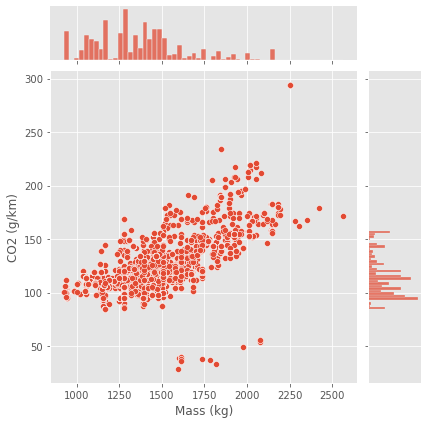

In [108]:
sns.jointplot(ml_transform['Mass (kg)' ],ml_transform['CO2 (g/km)'])

/Users/abdulhakiim/opt/anaconda3/envs/PythonData/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


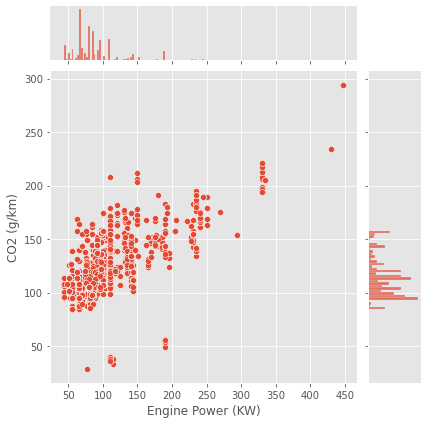

In [109]:
sns.jointplot(ml_transform['Engine Power (KW)' ],ml_transform['CO2 (g/km)'])

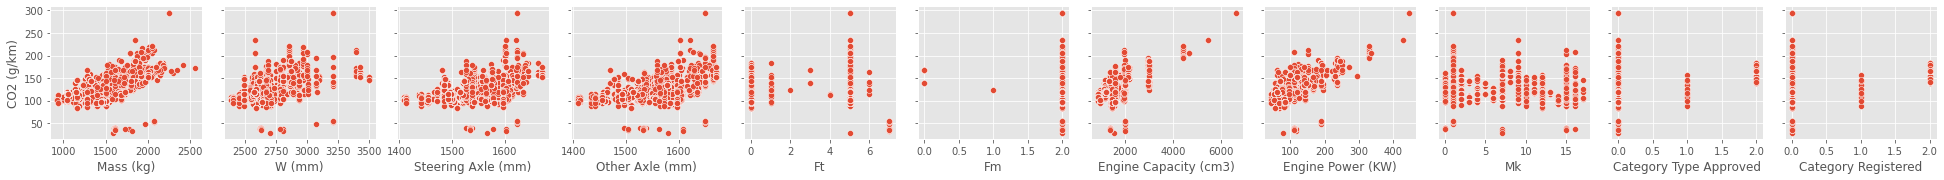

In [115]:
sns.pairplot(
    ml_transform,
    x_vars=['Mass (kg)','W (mm)','Steering Axle (mm)','Other Axle (mm)', 'Ft', 'Fm', 'Engine Capacity (cm3)','Engine Power (KW)','Mk', 'Category Type Approved', 'Category Registered'],
    y_vars=['CO2 (g/km)'],
)

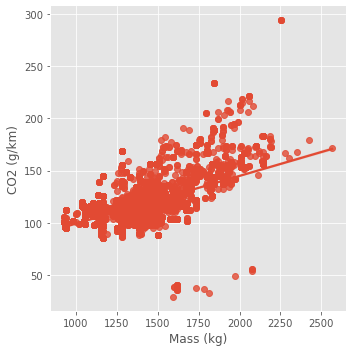

In [114]:
sns.lmplot(x='Mass (kg)',y ='CO2 (g/km)', data=ml_transform)

# Training and Testing our Dataset with Linear Regression

In [116]:
# Independent and dependent variables
X = ml_transform[['Mass (kg)','W (mm)','Steering Axle (mm)','Other Axle (mm)', 'Ft', 'Fm', 'Engine Capacity (cm3)','Engine Power (KW)','Mk', 'Category Type Approved', 'Category Registered']]
y = ml_transform['CO2 (g/km)']

In [117]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [118]:
# Training linear regression model on training dataset
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [119]:
# Printing out the Coefficient
print('Coefficients: \n', lin.coef_)

Coefficients: 
 [ 2.40079349e-02  2.00459473e-02  2.35716174e-02  1.75931397e-02
  6.08235473e+00 -2.21725006e+01  2.14360646e-02 -2.63088035e-02
 -1.44219289e-01  1.20825535e+00  2.26320168e+00]


In [121]:
# Prediction
LR_prediction = lin.predict(X_test)
LR_prediction

array([156.52467891, 128.48749284, 150.46414424, ...,  96.41899711,
       100.41910556, 103.18022511])

Text(0, 0.5, 'Y Prediction')

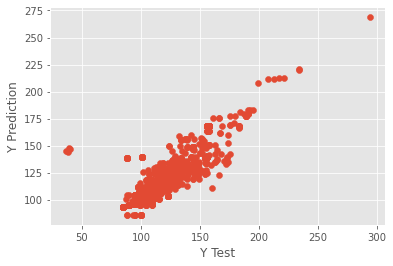

In [122]:
plt.scatter(y_test,LR_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

In [123]:
# Print scores
print("Training data score:", lin.score(X_train,y_train))
print("Testing data score: ", lin.score(X_test,y_test))

Training data score: 0.7312310194896446
Testing data score:  0.7518502692400233


In [124]:
# Model accuracy
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
print("Mean-Squared Error:",mean_squared_error(y_test,LR_prediction))
print("Explained Variance Score:",explained_variance_score(y_test, LR_prediction))
print("r2_Score:",r2_score(y_test,LR_prediction))

Mean-Squared Error: 118.8759423256339
Explained Variance Score: 0.7521622608485087
r2_Score: 0.7518502692400233


In [125]:
#Coffecient DataFrame
coeffecients = pd.DataFrame(lin.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Mass (kg),0.024008
W (mm),0.020046
Steering Axle (mm),0.023572
Other Axle (mm),0.017593
Ft,6.082355
Fm,-22.172501
Engine Capacity (cm3),0.021436
Engine Power (KW),-0.026309
Mk,-0.144219
Category Type Approved,1.208255


# Ridge Regression

In [126]:
# Independent and dependent variables
X = ml_transform[['Mass (kg)','W (mm)','Steering Axle (mm)','Other Axle (mm)', 'Ft', 'Fm', 'Engine Capacity (cm3)','Engine Power (KW)','Mk', 'Category Type Approved', 'Category Registered']]
y = ml_transform['CO2 (g/km)']

In [127]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [157]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [158]:
# Printing out the Coefficient
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [ 2.43080261e-02  1.87253103e-02  2.31126763e-02  2.13330433e-02
  6.17052004e+00 -2.21801792e+01  2.17503020e-02 -2.61341220e-02
 -1.35786588e-01  7.74779922e-01  2.80806118e+00]


In [159]:
# Prediction
ridge_prediction = ridge.predict(X_test)
ridge_prediction

array([109.21756982,  95.73937995, 105.67882391, ..., 103.87250507,
       121.41953168,  96.21211152])

Text(0, 0.5, 'Y Prediction')

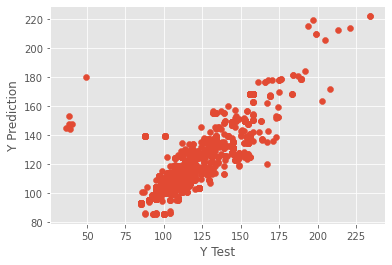

In [160]:
plt.scatter(y_test,ridge_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

In [161]:
# Print scores
print("Training data score:", ridge.score(X_train,y_train))
print("Testing data score: ", ridge.score(X_test,y_test))

Training data score: 0.7410555476399523
Testing data score:  0.7117531307090434


In [162]:
# Model accuracy
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
print("Mean-Squared Error:",mean_squared_error(y_test,ridge_prediction))
print("Explained Variance Score:",explained_variance_score(y_test, ridge_prediction))
print("r2_Score:",r2_score(y_test,ridge_prediction))

Mean-Squared Error: 135.53537255419658
Explained Variance Score: 0.711982906631096
r2_Score: 0.7117531307090434


In [163]:
#Ridge Coffecient DataFrame
coeffecients_2 = pd.DataFrame(ridge.coef_,X.columns)
coeffecients_2.columns = ['Coeffecient']
coeffecients_2

,Coeffecient
Mass (kg),0.024308
W (mm),0.018725
Steering Axle (mm),0.023113
Other Axle (mm),0.021333
Ft,6.170520
Fm,-22.180179
Engine Capacity (cm3),0.021750
Engine Power (KW),-0.026134
Mk,-0.135787
Category Type Approved,0.774780


# Single Linear Regression

In [140]:
# Independent and dependent variables
X = ml_transform['Ft']
y = ml_transform['CO2 (g/km)']

In [141]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [143]:
# Training linear regression model on training dataset
from sklearn.linear_model import LinearRegression
linn=LinearRegression()
linn.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

LinearRegression()

In [144]:
# Printing out the Coefficient
print('Coefficients: \n', linn.coef_)

Coefficients: 
 [[1.91461085]]


In [146]:
# Prediction
SR_prediction = linn.predict(np.array(X_test).reshape(-1,1))
SR_prediction

array([[120.93957656],
       [120.93957656],
       [111.36652229],
       ...,
       [111.36652229],
       [120.93957656],
       [120.93957656]])

Text(0, 0.5, 'Y Prediction')

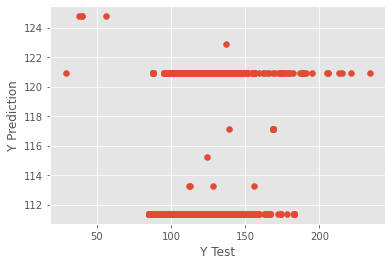

In [147]:
plt.scatter(y_test,SR_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

In [149]:
# Print scores
print("Training data score:", linn.score(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1)))
print("Testing data score: ", linn.score(np.array(X_test).reshape(-1,1), np.array(y_test).reshape(-1,1)))

Training data score: 0.04795381256100684
Testing data score:  0.0446954769006036


In [150]:
# Model accuracy
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
print("Mean-Squared Error:",mean_squared_error(y_test,SR_prediction))
print("Explained Variance Score:",explained_variance_score(y_test, SR_prediction))
print("r2_Score:",r2_score(y_test,SR_prediction))

Mean-Squared Error: 466.9950943482923
Explained Variance Score: 0.04531056775940634
r2_Score: 0.0446954769006036


# Lasso Regression

In [155]:
# Independent and dependent variables
X = ml_transform[['Mass (kg)','W (mm)','Steering Axle (mm)','Other Axle (mm)', 'Ft', 'Fm', 'Engine Capacity (cm3)','Engine Power (KW)','Mk', 'Category Type Approved', 'Category Registered']]
y = ml_transform['CO2 (g/km)']

In [156]:
# Splitting into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [170]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [171]:
# Printing out the Coefficient
print('Coefficients: \n', lasso.coef_)

Coefficients: 
 [ 2.63612105e-02  1.98435404e-02  3.47192252e-02 -9.95406474e-04
  6.11573556e+00 -0.00000000e+00  2.25292667e-02 -2.62766685e-02
 -1.66399196e-01  0.00000000e+00  0.00000000e+00]


In [172]:
# Prediction
L_prediction = lasso.predict(X_test)
L_prediction

array([109.44181732,  96.36802103, 105.51164297, ..., 104.21788371,
       121.36929024,  96.34723604])

Text(0, 0.5, 'Y Prediction')

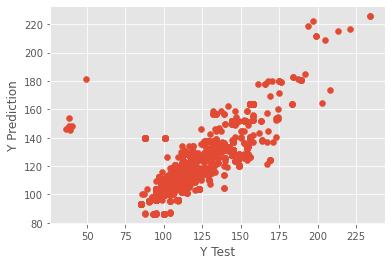

In [173]:
plt.scatter(y_test,L_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

In [174]:
# Print scores
print("Training data score:", lasso.score(X_train,y_train))
print("Testing data score: ", lasso.score(X_test,y_test))

Training data score: 0.7283737674177112
Testing data score:  0.698573834386189


In [175]:
# Model accuracy
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
print("Mean-Squared Error:",mean_squared_error(y_test,L_prediction))
print("Explained Variance Score:",explained_variance_score(y_test, L_prediction))
print("r2_Score:",r2_score(y_test,L_prediction))

Mean-Squared Error: 141.7323551667542
Explained Variance Score: 0.6987450607984662
r2_Score: 0.698573834386189


In [176]:
#Coffecient DataFrame
coeffecients = pd.DataFrame(lasso.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Mass (kg),0.026361
W (mm),0.019844
Steering Axle (mm),0.034719
Other Axle (mm),-0.000995
Ft,6.115736
Fm,-0.000000
Engine Capacity (cm3),0.022529
Engine Power (KW),-0.026277
Mk,-0.166399
Category Type Approved,0.000000
